# Introduction

With growth in the telecom industry and increasing competition  it has become extremely difficult to offer great deals to the customer, while maintaining profits and being a strong competitor among other competitors in the industry. To do so we need to understand customer behavior and other factors which contribute to retaining customers.


reference to the data set - https://www.kaggle.com/datasets/barun2104/telecom-churn?datasetId=567482&sortBy=voteCount 

# Inspiration



1.   Who are the customers about to churn? 
2.   Which features are contributing to customer churn?



# Basic terminology

**Multicollinearity** -  Multicollinearity occurs when there are two or more independent variables, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent (Target) variable.
For more details - https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea 

**Variance Inflation Factor**- A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables. A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables.
For more details - https://www.investopedia.com/terms/v/variance-inflation-factor.asp



# 1. Import data and python packages

In [ ]:
#Modules for 

# Analysis and EDA    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import ptitprince

%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Reading the Telecom data 
df = pd.read_csv('./telecom_churn.csv')
df.head(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


# 2. Understanding the Data

In [ ]:
#Checking the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


Here we check for numbers of rows in each feature of data frame and number of null values in each feature.

In [ ]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


there are total of 11 features out of which **Churn** is Dependent/Target variable. this is Data Frame with descriptive statistics for features.

In [ ]:
#checking how many rows and columns in the data frame
df.shape

(3333, 11)

In [ ]:
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

We can see that there is no missing or null value in any of the features

In [ ]:
df.nunique()

Churn                 2
AccountWeeks        212
ContractRenewal       2
DataPlan              2
DataUsage           174
CustServCalls        10
DayMins            1667
DayCalls            119
MonthlyCharge       627
OverageFee         1024
RoamMins            162
dtype: int64

this gives us unique values for each field. we see there in total of 3 catagorical feature (with value 2) ie. Churn,ContractRenewal & DataPlan and rest are all numeric.

# 3. Data Visualization

In [ ]:
colmn = df.columns
binary_colmns = []
numeric_colmns= []
for i in colmn:
    if df[i].value_counts().shape[0] == 2:
        binary_colmns.append(i)
    else:
      
      numeric_colmns.append(i)


we use the above code snippet to set the lists binary_colmn and numeric_colmns with catagorical columns and numeric columns respectively 

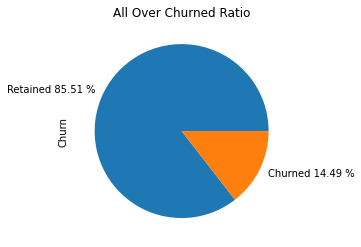

In [ ]:
df["Churn"].value_counts().plot(kind="pie", title="All Over Churned Ratio",
                                labels = ["Retained {:.2f} %".format(len(df.loc[df.Churn==0])*100/len(df.Churn)),
                                          "Churned {:.2f} %".format(len(df.loc[df.Churn==1])*100/len(df.Churn))],
                                figsize=(4,4))

Overall approx 14.5 of the have churned compared to 85.5% retained customers.  The dataset here is imbalanced churn data but only ~ 1:6, which is not too bad.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


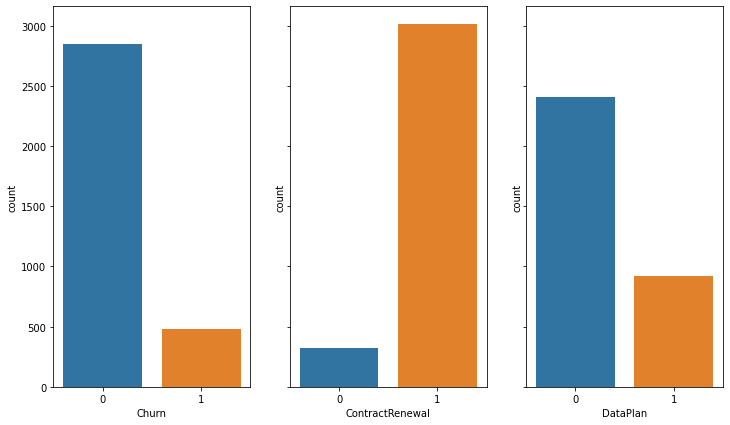

In [ ]:
fig, axes = plt.subplots(1, len(binary_colmns), figsize=(12, 7), sharey=True)
j=0
for i in binary_colmns:
  sns.countplot(str(i), data=df, ax=axes[binary_colmns.index(i)])

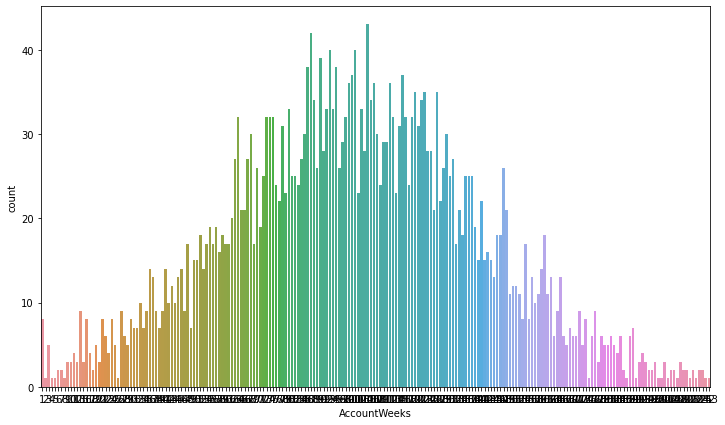

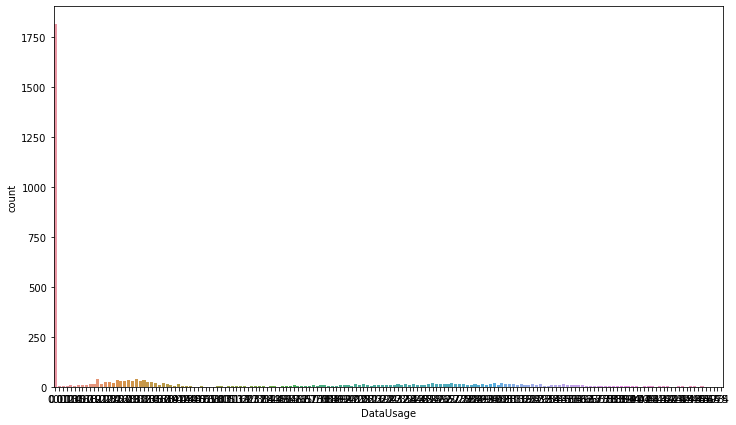

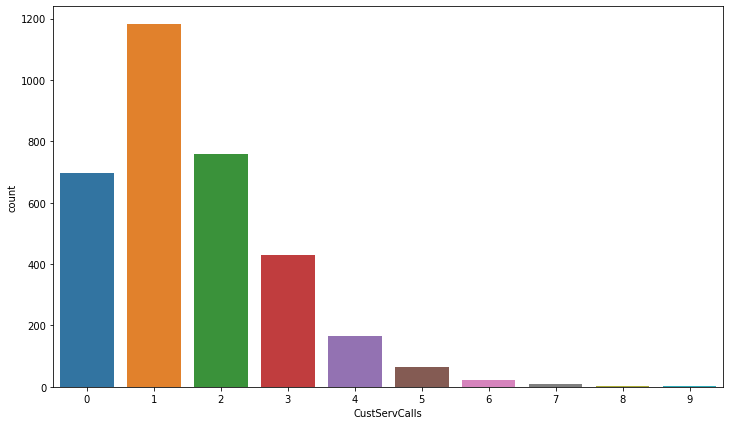

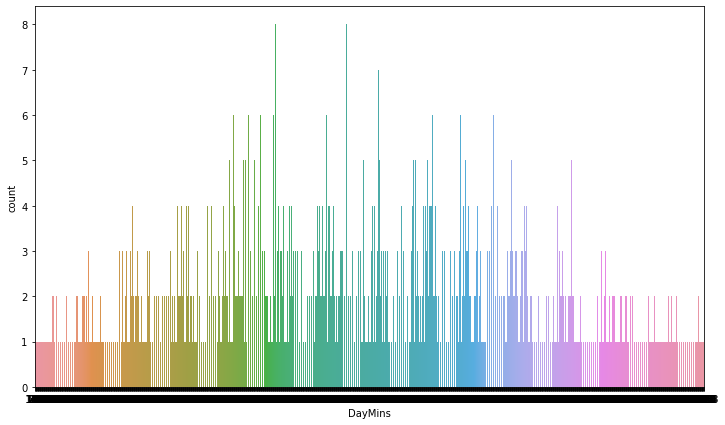

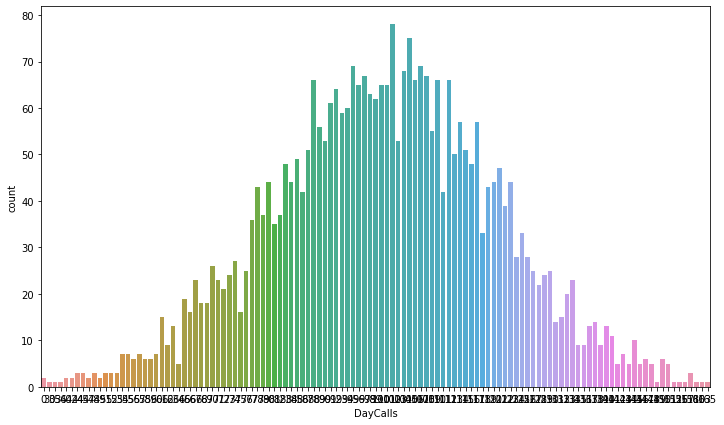

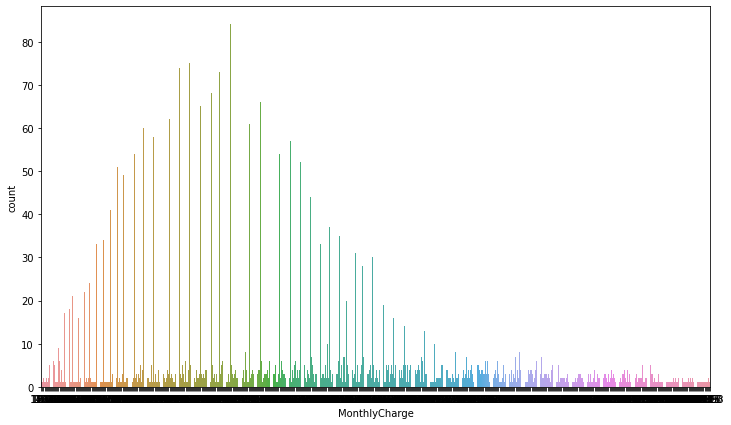

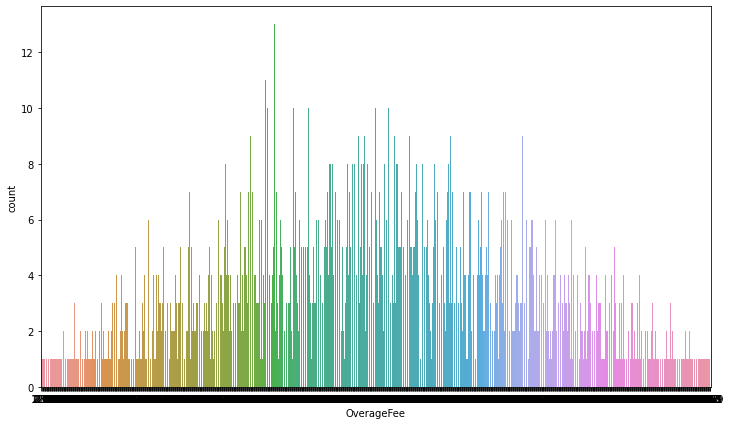

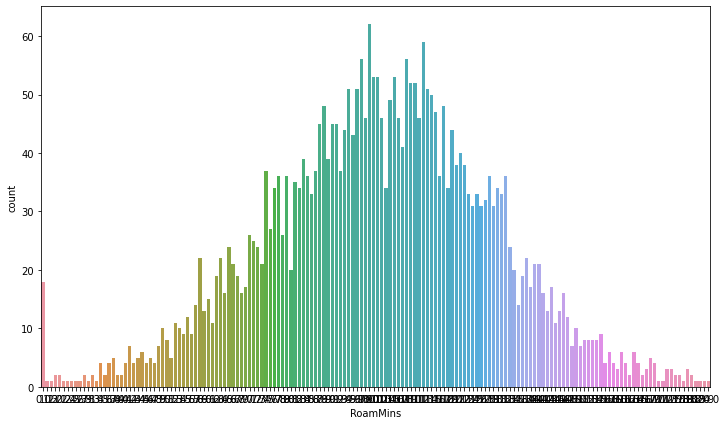

In [ ]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 12,7
for i in numeric_colmns:
  sns.countplot(x =str(i), data=df)
  plt.show()

<Figure size 576x360 with 0 Axes>

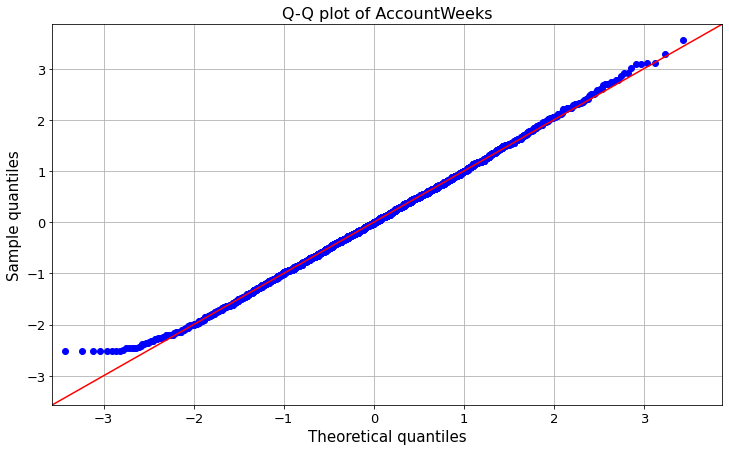

<Figure size 576x360 with 0 Axes>

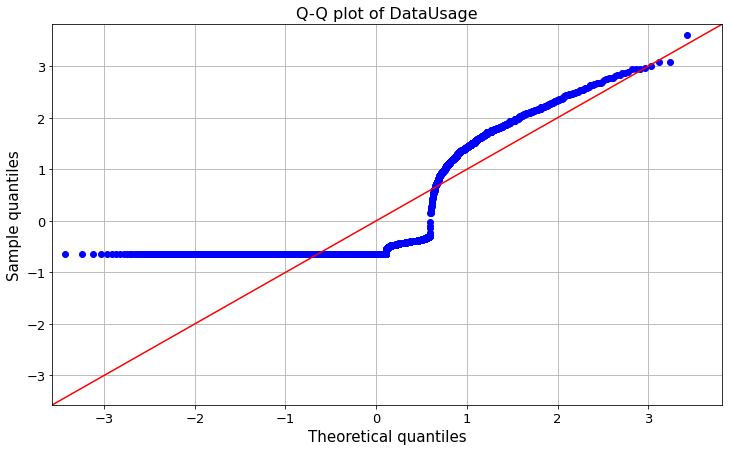

<Figure size 576x360 with 0 Axes>

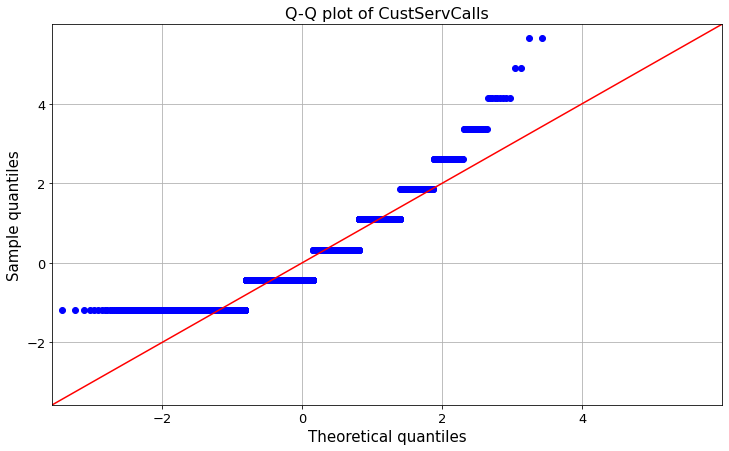

<Figure size 576x360 with 0 Axes>

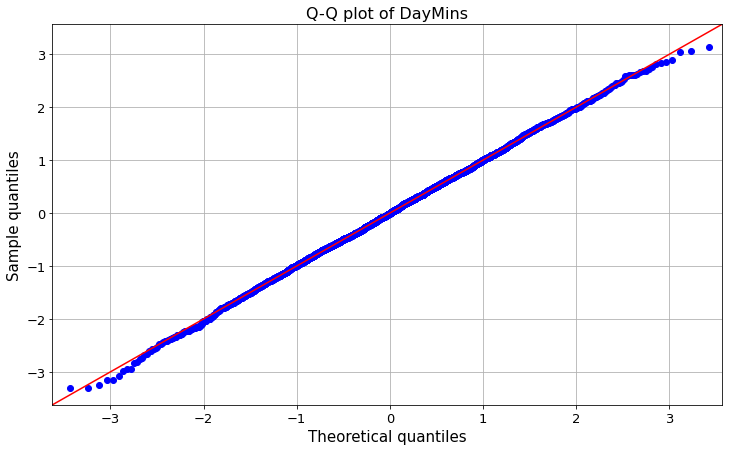

<Figure size 576x360 with 0 Axes>

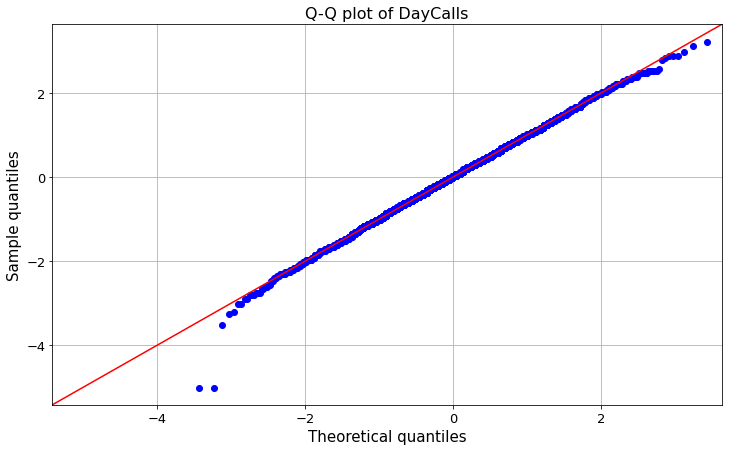

<Figure size 576x360 with 0 Axes>

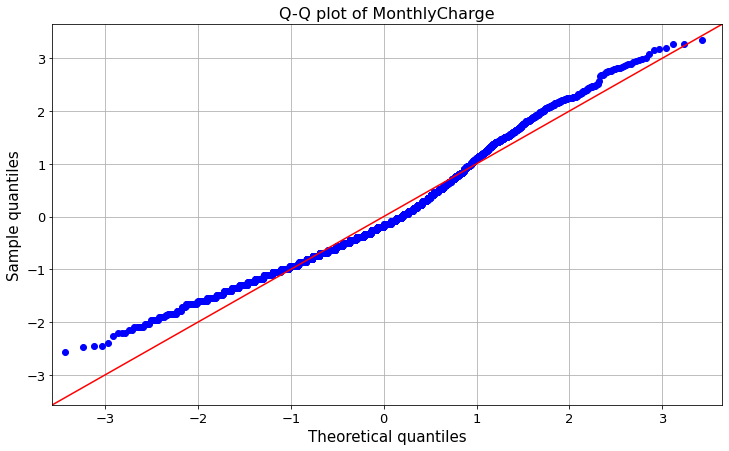

<Figure size 576x360 with 0 Axes>

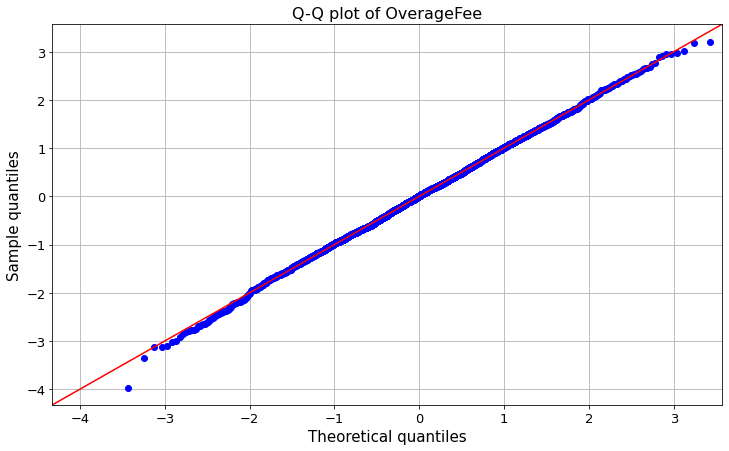

<Figure size 576x360 with 0 Axes>

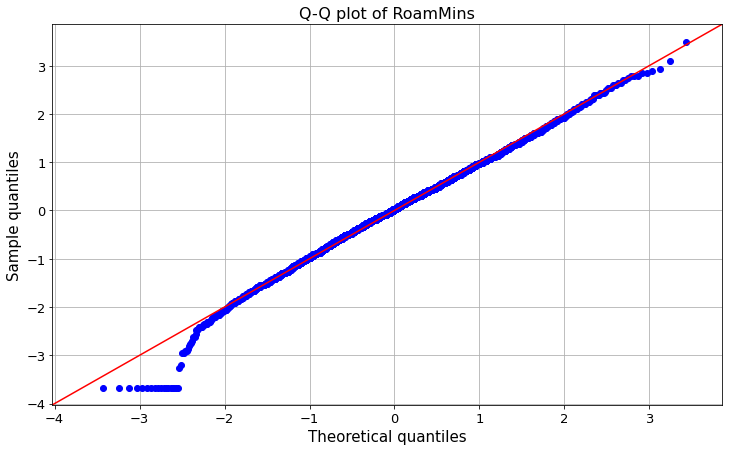

In [ ]:
#checking the distribution of independent variable  

from statsmodels.graphics.gofplots import qqplot
for i in numeric_colmns:
  plt.figure(figsize=(8,5))
  fig=qqplot(df[i],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(i),fontsize=16)
  plt.grid(True)
  plt.show()



1.   In the above plots we can see most of the independent variable are normally distributed except for Customer Service Call (CustServCalls) and Data Usage. 
2. A better understanding how QQ plots work and how independent variable's distribution can be found are in the links below  

*   https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0
*   https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/







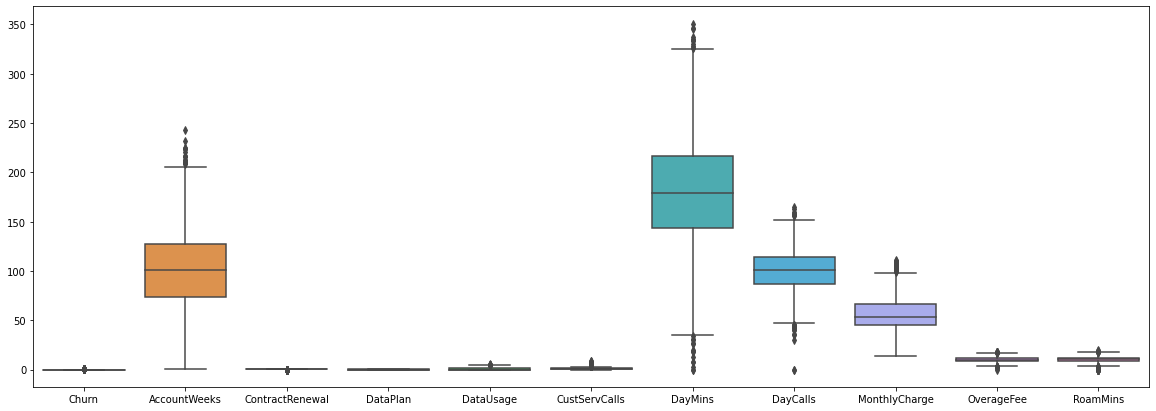

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df)

From the above we can conclude that the feature have variable ranges/not in same range.  

In [ ]:
numeric_df=pd.DataFrame([df.AccountWeeks,df.DayMins,df.DayCalls,df.OverageFee,df.RoamMins,df.DataUsage,df.MonthlyCharge,df.ContractRenewal,df.CustServCalls]).transpose()
binary_df=pd.DataFrame([df.DataPlan,df.Churn]).transpose()
numeric_df.head()

,AccountWeeks,DayMins,DayCalls,OverageFee,RoamMins,DataUsage,MonthlyCharge,ContractRenewal,CustServCalls
0,128.0,265.1,110.0,9.87,10.0,2.7,89.0,1.0,1.0
1,107.0,161.6,123.0,9.78,13.7,3.7,82.0,1.0,1.0
2,137.0,243.4,114.0,6.06,12.2,0.0,52.0,1.0,0.0
3,84.0,299.4,71.0,3.10,6.6,0.0,57.0,0.0,2.0
4,75.0,166.7,113.0,7.42,10.1,0.0,41.0,0.0,3.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df),columns=numeric_df.columns)
numeric_df.head()

,AccountWeeks,DayMins,DayCalls,OverageFee,RoamMins,DataUsage,MonthlyCharge,ContractRenewal,CustServCalls
0,0.676489,1.566767,0.476643,-0.071584,-0.085008,1.480204,1.990727,0.327580,-0.427932
1,0.149065,-0.333738,1.124503,-0.107082,1.240482,2.266072,1.564510,0.327580,-0.427932
2,0.902529,1.168304,0.675985,-1.574346,0.703121,-0.641642,-0.262133,0.327580,-1.188218
3,-0.428590,2.196596,-1.466936,-2.741846,-1.303026,-0.641642,0.042307,-3.052685,0.332354
4,-0.654629,-0.240090,0.626149,-1.037927,-0.049184,-0.641642,-0.931902,-3.052685,1.092641


In [ ]:
df=pd.concat([numeric_df,binary_df], axis=1)

In [ ]:
df.head()

,AccountWeeks,DayMins,DayCalls,OverageFee,RoamMins,DataUsage,MonthlyCharge,ContractRenewal,CustServCalls,DataPlan,Churn
0,0.676489,1.566767,0.476643,-0.071584,-0.085008,1.480204,1.990727,0.327580,-0.427932,1,0
1,0.149065,-0.333738,1.124503,-0.107082,1.240482,2.266072,1.564510,0.327580,-0.427932,1,0
2,0.902529,1.168304,0.675985,-1.574346,0.703121,-0.641642,-0.262133,0.327580,-1.188218,0,0
3,-0.428590,2.196596,-1.466936,-2.741846,-1.303026,-0.641642,0.042307,-3.052685,0.332354,0,0
4,-0.654629,-0.240090,0.626149,-1.037927,-0.049184,-0.641642,-0.931902,-3.052685,1.092641,0,0


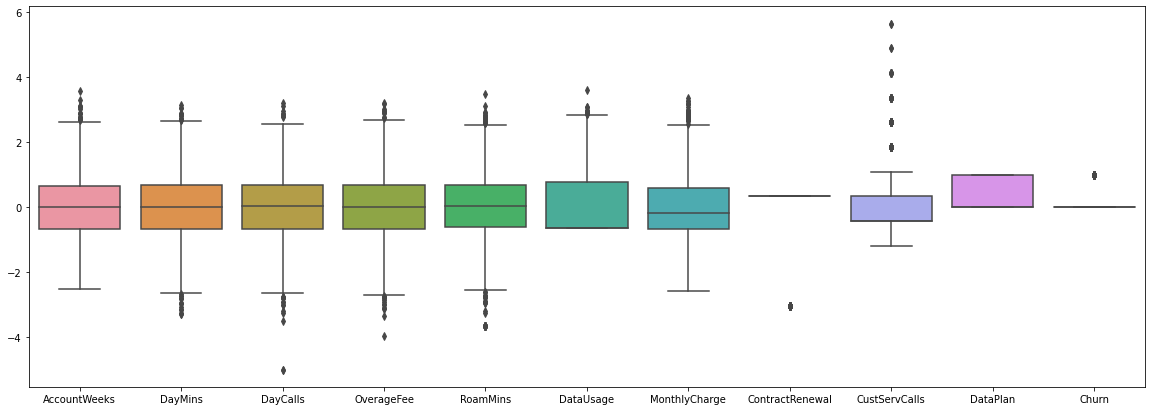

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df)

In [ ]:
#Pearson's Correlation methord
corr = df.corr(method='pearson')

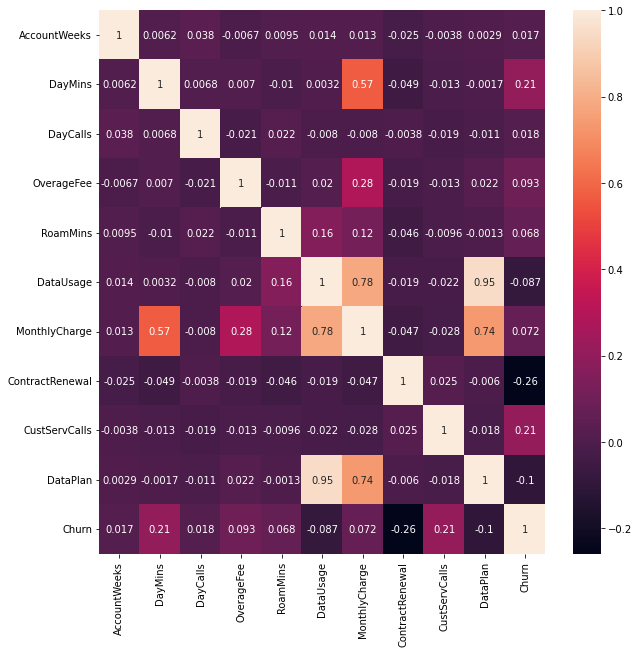

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,xticklabels=df.columns,yticklabels=df.columns,annot=True,ax=ax)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


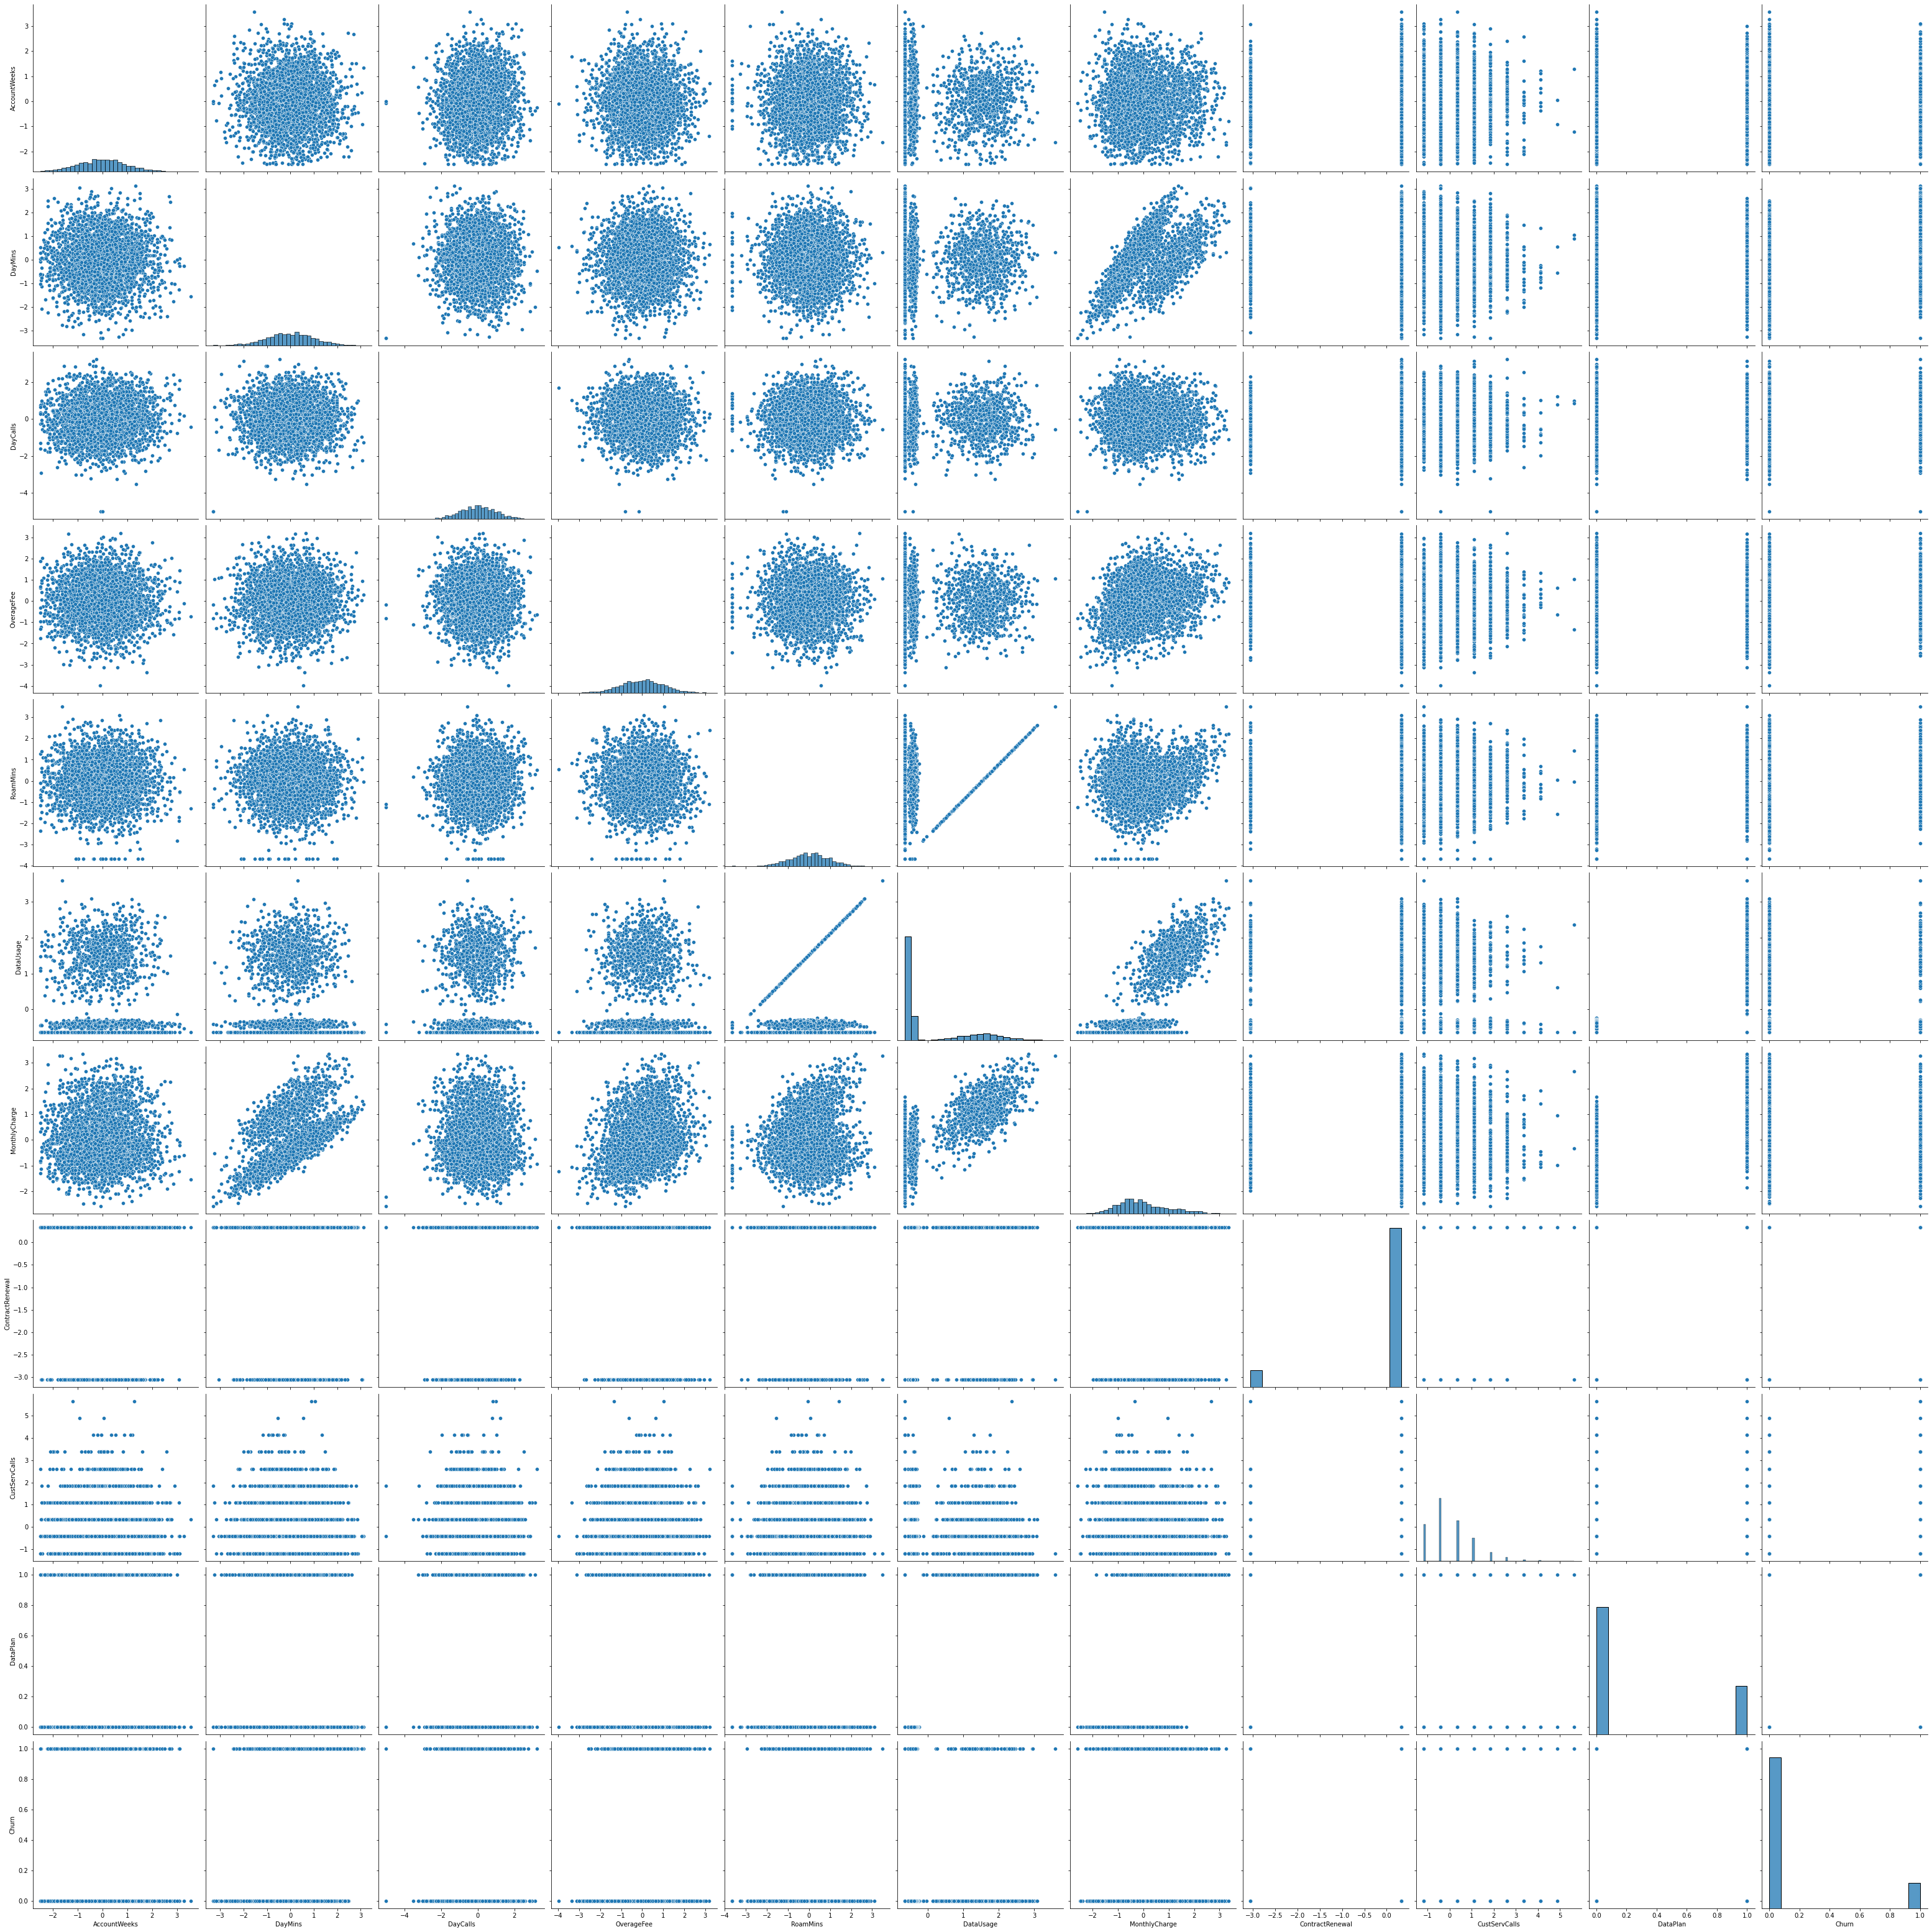

In [ ]:
#Pairplots to Visulisly see Correlation
sns.pairplot(df,size=4)


In [ ]:
#Spearman's Correlation 
corr = df.corr(method='spearman')

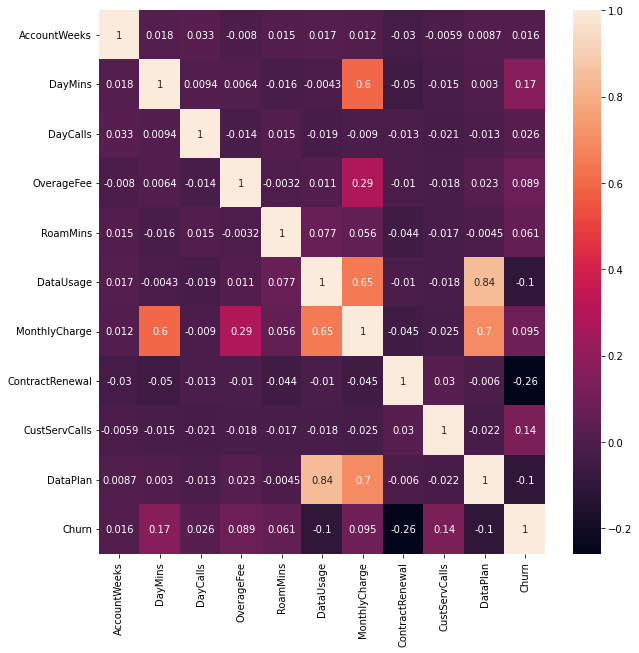

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,xticklabels=df.columns,yticklabels=df.columns,annot=True,ax=ax)

We can conclude that ContractactRenewal, CustServCalls, DataPlan, DataUsage and DayMins are fairly related. Values of correlation are supposed be in range from +1 and -1, with values close to +1 to show strong (+)ve correlation and values close to -1 to show strong (-)ve correlation and 0 if absolutly no relation. We also observe very strong Multicollinearity between features, DataPlans and DataUsage as well as MonthlyCharges with DataPlan and DataUsage. hence we shall calculate Variance Inflation Factor (VIF)

# 4. Collinearity and Feature Significance

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, j)
                          for j in range(len(df.columns))]
  
print(vif_data)

            feature          VIF
0      AccountWeeks     1.003148
1           DayMins  1031.248485
2          DayCalls     1.003356
3        OverageFee   224.581665
4          RoamMins     1.116328
5         DataUsage  1950.882216
6     MonthlyCharge  3242.525190
7   ContractRenewal     1.082328
8     CustServCalls     1.056660
9          DataPlan     3.459423
10            Churn     1.360563


Here we calculate the **variance inflation factor** (VIF). We observe DayMins, OverageFee, DataUsage, MonthlyCharge features have fairly high VIF values 

The permisabe range for VIF is less than 5 or 10 based on the problem.

In [ ]:
def correlation(dataset, threshold):
  col_corr = set ()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns [i] # getting the name of column
        col_corr.add(colname)
  print(col_corr)
  return col_corr
col_corr=correlation(df,0.7)

{'DataPlan', 'MonthlyCharge'}


In this code snipet we get name of feature which show high collinearity based on the threshold we set

I've set the threshold to 0.7  

In [ ]:
columns=[]
columns= col_corr
df.drop(columns, inplace=True, axis=1)

This code simply finds all the features which has values of Collinearity greater than the threshold( recommended value for threshold is  greater than 0.7 based on problem) subsequentily we drop these features off the data frame.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

           feature       VIF
0     AccountWeeks  1.002504
1          DayMins  1.041443
2         DayCalls  1.003304
3       OverageFee  1.010305
4         RoamMins  1.036246
5        DataUsage  1.039115
6  ContractRenewal  1.069948
7    CustServCalls  1.049375
8            Churn  1.175334


Here we simply recalculate the VIF values again. As we can see here on drop of features MonthlyCharges and DataPlan the VIF score of most of the features has reduced down to less than 5. which is still acceptable.

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm
model = sm.OLS(df['Churn'], df[['DayMins', 'DayCalls','AccountWeeks','OverageFee','RoamMins','DataUsage','CustServCalls','ContractRenewal']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Churn   R-squared (uncentered):                   0.149
Model:                            OLS   Adj. R-squared (uncentered):              0.147
Method:                 Least Squares   F-statistic:                              72.87
Date:                Sat, 08 Oct 2022   Prob (F-statistic):                   5.86e-111
Time:                        20:32:05   Log-Likelihood:                         -1241.1
No. Observations:                3333   AIC:                                      2498.
Df Residuals:                    3325   BIC:                                      2547.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
DayMins             0.0690      0.006     11.308      0.000       0.057       0.081
DayCalls            0.0068      0.006      1.120      0.263      -0.005       0.019
AccountWeeks        0.0037      0.006      0.608      0.543      -0.008       0.016
OverageFee          0.0327      0.006      5.360      0.000       0.021       0.045
RoamMins            0.0274      0.006      4.440      0.000       0.015       0.040
DataUsage          -0.0361      0.006     -5.839      0.000      -0.048      -0.024
CustServCalls       0.0766      0.006     12.573      0.000       0.065       0.089
ContractRenewal    -0.0886      0.006    -14.511      0.000      -0.101      -0.077
==============================================================================
Omnibus:                      832.786   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1650.635
Skew:                           1.515   Prob(JB):                         0.00
Kurtosis:                       4.644   Cond. No.                         1.20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 


*   A p-value measures the probability of obtaining the observed results,assuming that the null hypothesis is true.
*   A p-value of 0.05 or lower is generally considered statistically significant.


DayCalls, AccountWeeks have P value greater than 0.05 they can be considered non-sigificant.


For More details on P values 
*   https://www.investopedia.com/terms/p/p-value.asp
*   https://youtu.be/zII6KLR4Lb4





# 5. Test and Train data

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [ ]:
X.head()
X.shape

(3333, 8)

In [ ]:
from sklearn.model_selection import  train_test_split

X = df[ ['DayMins', 'DayCalls','AccountWeeks','OverageFee','RoamMins','DataUsage','CustServCalls','ContractRenewal']]

y = df['Churn']



X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)



Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

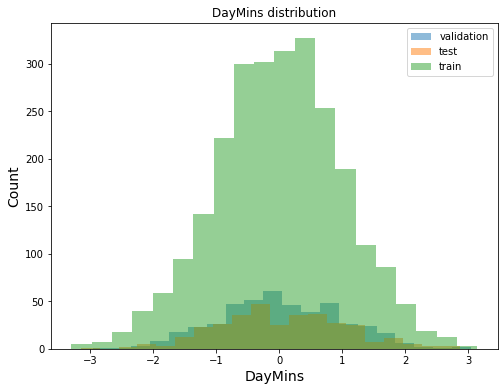

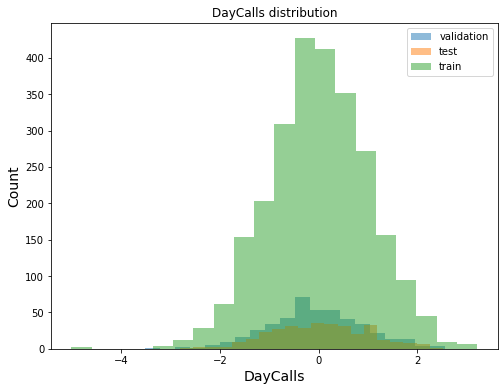

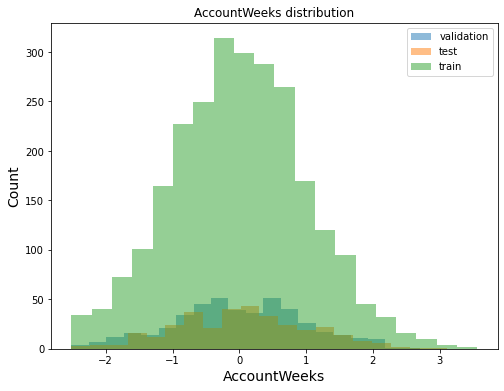

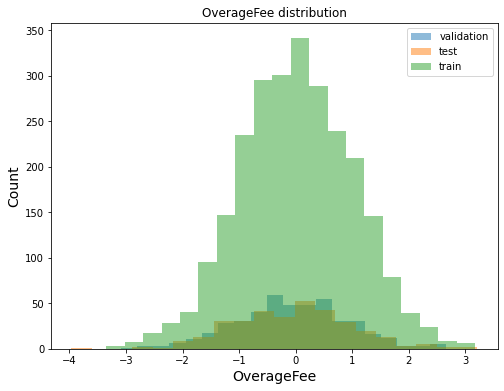

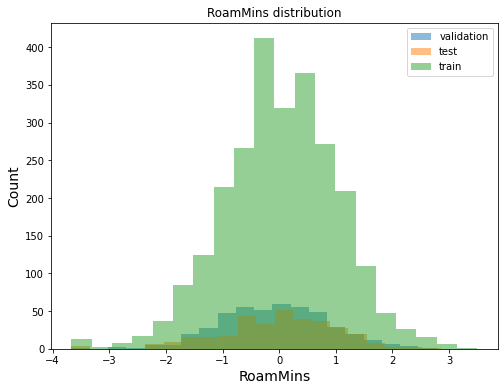

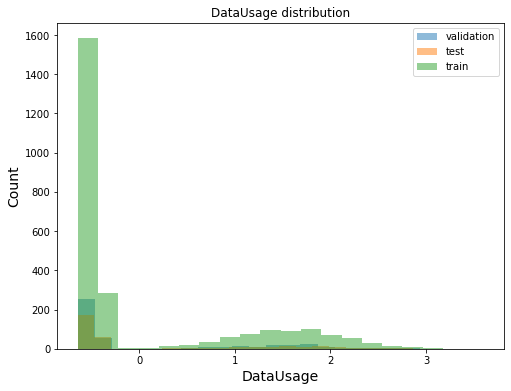

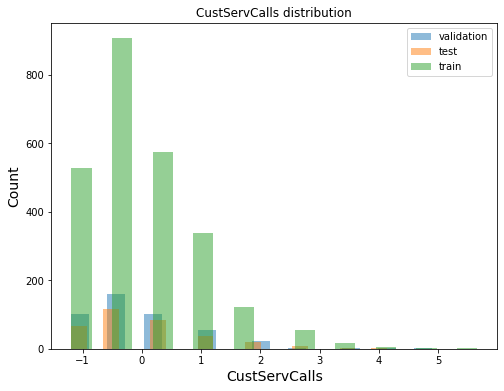

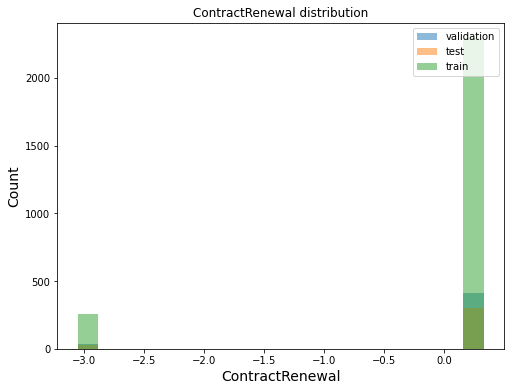

In [ ]:
X_test_plot = X_test[['DayMins', 'DayCalls','AccountWeeks','OverageFee','RoamMins','DataUsage','CustServCalls','ContractRenewal']]

X_val_plot = X_val[['DayMins', 'DayCalls','AccountWeeks','OverageFee','RoamMins','DataUsage','CustServCalls','ContractRenewal']]

X_train_plot = X_train[['DayMins', 'DayCalls','AccountWeeks','OverageFee','RoamMins','DataUsage','CustServCalls','ContractRenewal']]
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

Train, test and validation data have the lmost the same data as we conclude from the above graph  

# 6. Imputation

In [ ]:
# NullValue Setter function
def nullfiller(df,per):

  # get dimensions of df
  nrows, ncols = len(df.index), len(df.columns)          

  volume = nrows * ncols                    # total number of entries in df
  volume_to_be_nan = int(volume * per)      # number of entries to turn to NaN as per percentage

  # randomly generate index locations for the new NaNs
  indices = np.random.randint(volume, size=volume_to_be_nan)
  row_indices = indices % nrows
  col_indices = (indices / nrows).astype(int)

  # assign NaN to each of the indices in df
  for ri, ci in zip(row_indices, col_indices):
    df.iloc[ri, ci] = np.nan

**NaN Filler**
this code snippet intruduces NaN values randomly through the data, based percentage of NaNs we want in the data 

In [ ]:
# KNN Imputer
import numpy as np
from sklearn.impute import KNNImputer

def KNNImp(changed_Numeric):
  imputer = KNNImputer(n_neighbors=2, weights="uniform")
  k=imputer.fit_transform(changed_Numeric)
  k=pd.DataFrame(k)
  k.columns=changed_Numeric.columns
  k.index=changed_Numeric.index
  k=pd.DataFrame(k)
  return k

KNNimputer is a scikit-learn class used to fill out or predict the missing values in a dataset. It is a more useful method which works on the basic approach of the KNN algorithm rather than the naive approach of filling all the values with mean or the median. In this approach, we specify a distance from the missing values which is also known as the K parameter. The missing value will be predicted in reference to the mean of the neighbours.

More on it -
* https://www.geeksforgeeks.org/python-imputation-using-the-knnimputer/
* https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html



In [ ]:
# Simple Imputer
import numpy as np
from sklearn.impute import SimpleImputer
def SimpleImp(changed_Numeric):
  imp = SimpleImputer(missing_values=np.nan, strategy='mean')
  imp.fit(changed_Numeric)
  c=imp.transform(changed_Numeric)
  c=pd.DataFrame(c)
  c.columns=changed_Numeric.columns
  c.index=changed_Numeric.index
  return c


The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. 

More on it -
*   https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
*   https://www.geeksforgeeks.org/ml-handle-missing-data-with-simple-imputer/



In [ ]:
# Iterative Imputer
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
def IterImp(changed_Numeric):
  imp = IterativeImputer(max_iter=10, random_state=0)
  imp.fit(changed_Numeric)
  IterativeImputer(random_state=0)
  f= pd.DataFrame(np.round(imp.transform(changed_Numeric)))
  f.columns=changed_Numeric.columns
  f.index=changed_Numeric.index
  return f

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

*   https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
*   https://towardsdatascience.com/iterative-imputation-with-scikit-learn-8f3eb22b1a38



In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error



def mape(actual,pred,mae,mse):
  errormae=[]
  errormse=[]
  for i in k.columns:
    z=mean_absolute_percentage_error(actual[i],pred[i])*100
    g=mean_squared_error(actual[i],pred[i])*100
    errormae.append(z)
    errormse.append(g)
    
  error_tenper[mae]=errormae
  error_tenper[mse]=errormse

  error_tenper.index=actual.columns
  return error_tenper
    #return np.mean(np.abs((actual - pred) / actual)) * 100



maps function calculates mean square error and mean absolute error

In [ ]:
df4=df.copy()
original_Numeric = df4.drop(["Churn"], axis=1)
original_Cat = df4[["Churn"]]
nullfiller(df4,0.1)
changed_Numeric = df4.drop(["Churn"], axis=1)
changed_Cat = df4[["Churn"]]

We create original cat(catagorical Data) and numeric(Numeric Data) DataFrames to retain original values and fill 10% of NaN values now changed Numeric(Numeric Data) and Cat(catagorical Data) with NaN values.

In [ ]:
def vari(a,m):
  var=np.var(a)
  sse= np.mean((np.mean(a) - original_Numeric)** 2)
  bias = sse - var
  print(m)
  print("*********************varience***********************"+"\n")
  print(var)
  print("#################################################################")

  print("*********************Simple Square error***********************"+"\n")
  print(sse)
  print("#################################################################")

  print("*********************bias***********************"+"\n")
  print(bias)
  print("#################################################################")



function vari calulates Varience, Simple error and Bias

In [ ]:
error_tenper=pd.DataFrame()

In [ ]:
mae="KNNImputer mean absolute error percentage"
mse="KNNImputer mean square error percentage"
k=KNNImp(changed_Numeric)
mape(original_Numeric,k,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage
AccountWeeks,51.974541,12.269819
DayMins,43.935900,14.527604
DayCalls,22.538415,13.300196
OverageFee,100.822221,14.810357
RoamMins,21.328846,12.113771
DataUsage,11.077776,14.235397
ContractRenewal,11.871111,15.426905
CustServCalls,12.057795,13.358292


In [ ]:
m= "Varience ,Simple Square and error Bias for KNNImputer" 
vari(k,m)

Varience ,Simple Square and error Bias for KNNImputer
*********************varience***********************

AccountWeeks       0.950027
DayMins            0.955173
DayCalls           0.953063
OverageFee         0.938632
RoamMins           0.954000
DataUsage          0.940286
ContractRenewal    0.966511
CustServCalls      0.952657
dtype: float64
#################################################################
*********************Simple Square error***********************

AccountWeeks       1.000066
DayMins            1.000017
DayCalls           1.000001
OverageFee         1.000015
RoamMins           1.000162
DataUsage          1.000007
ContractRenewal    1.000083
CustServCalls      1.000090
dtype: float64
#################################################################
*********************bias***********************

AccountWeeks       0.050039
DayMins            0.044844
DayCalls           0.046939
OverageFee         0.061383
RoamMins           0.046161
DataUsage          0.059721

In [ ]:
mae="SimpleImputer mean absolute error percentage"
mse="SimpleImputer mean square error percentage"
c=SimpleImp(changed_Numeric)
mape(original_Numeric,c,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage,SimpleImputer mean absolute error percentage,SimpleImputer mean square error percentage
AccountWeeks,51.974541,12.269819,9.420546,8.792902
DayMins,43.935900,14.527604,9.590028,9.429055
DayCalls,22.538415,13.300196,8.695904,8.838757
OverageFee,100.822221,14.810357,9.870825,10.556353
RoamMins,21.328846,12.113771,9.092615,8.887354
DataUsage,11.077776,14.235397,9.882353,9.984478
ContractRenewal,11.871111,15.426905,10.226279,9.103111
CustServCalls,12.057795,13.358292,9.060347,9.151683


In [ ]:
m= "Varience ,Simple Square and error Bias for  SimpleImputer" 
vari(c,m)

Varience ,Simple Square and error Bias for  SimpleImputer
*********************varience***********************

AccountWeeks       0.912079
DayMins            0.905723
DayCalls           0.911625
OverageFee         0.894436
RoamMins           0.911127
DataUsage          0.900158
ContractRenewal    0.908986
CustServCalls      0.908485
dtype: float64
#################################################################
*********************Simple Square error***********************

AccountWeeks       1.000008
DayMins            1.000013
DayCalls           1.000013
OverageFee         1.000000
RoamMins           1.000001
DataUsage          1.000003
ContractRenewal    1.000017
CustServCalls      1.000002
dtype: float64
#################################################################
*********************bias***********************

AccountWeeks       0.087929
DayMins            0.094291
DayCalls           0.088388
OverageFee         0.105564
RoamMins           0.088874
DataUsage          0.09

In [ ]:
mae="Iterative Imputer mean absolute error percentage"
mse="Iterative Imputer mean square error percentage"
f=IterImp(changed_Numeric)
mape(original_Numeric,f,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage,SimpleImputer mean absolute error percentage,SimpleImputer mean square error percentage,Iterative Imputer mean absolute error percentage,Iterative Imputer mean square error percentage
AccountWeeks,51.974541,12.269819,9.420546,8.792902,59.920599,16.426749
DayMins,43.935900,14.527604,9.590028,9.429055,59.804109,17.111185
DayCalls,22.538415,13.300196,8.695904,8.838757,60.212415,16.365822
OverageFee,100.822221,14.810357,9.870825,10.556353,60.001617,17.917751
RoamMins,21.328846,12.113771,9.092615,8.887354,61.069706,16.224098
DataUsage,11.077776,14.235397,9.882353,9.984478,58.710202,21.155052
ContractRenewal,11.871111,15.426905,10.226279,9.103111,91.331354,17.823694
CustServCalls,12.057795,13.358292,9.060347,9.151683,66.863457,18.626123


In [ ]:
m= "Varience ,Simple Square and error Bias for IterativeImputer" 
vari(f,m)

Varience ,Simple Square and error Bias for IterativeImputer
*********************varience***********************

AccountWeeks       1.010725
DayMins            0.991807
DayCalls           0.986751
OverageFee         0.960453
RoamMins           0.982855
DataUsage          1.184162
ContractRenewal    0.723852
CustServCalls      0.765561
dtype: float64
#################################################################
*********************Simple Square error***********************

AccountWeeks       1.000076
DayMins            1.000092
DayCalls           1.000048
OverageFee         1.000243
RoamMins           1.000044
DataUsage          1.015058
ContractRenewal    1.070027
CustServCalls      1.011217
dtype: float64
#################################################################
*********************bias***********************

AccountWeeks      -0.010650
DayMins            0.008285
DayCalls           0.013297
OverageFee         0.039791
RoamMins           0.017189
DataUsage         -0.

In [ ]:
df5=df.copy()
original_Numeric_5per = df5.drop(["Churn"], axis=1)
original_Cat_5per = df5[["Churn"]]
nullfiller(df5,0.05)
changed_Numeric_5per = df5.drop(["Churn"], axis=1)
changed_Cat_5per = df5[["Churn"]]

We create original cat(catagorical Data) and numeric(Numeric Data) DataFrames to retain original values and fill 5% of NaN values now changed Numeric(Numeric Data) and Cat(catagorical Data) with NaN values.

In [ ]:
error_tenper=pd.DataFrame()

In [ ]:
changed_Numeric.isna().sum()

AccountWeeks       305
DayMins            318
DayCalls           290
OverageFee         329
RoamMins           303
DataUsage          330
ContractRenewal    337
CustServCalls      302
dtype: int64

In [ ]:
mae="KNNImputer mean absolute error percentage"
mse="KNNImputer mean square error percentage"
k=KNNImp(changed_Numeric_5per)
mape(original_Numeric_5per,k,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage
AccountWeeks,61.979538,6.904805
DayMins,11.193948,6.817519
DayCalls,11.483648,8.294434
OverageFee,64.919253,7.308501
RoamMins,12.666115,7.300795
DataUsage,5.159088,6.742952
ContractRenewal,4.296566,8.313388
CustServCalls,5.576341,5.285218


In [ ]:
m= "Varience ,Simple Square and error Bias for KNNImputer" 
vari(k,m)

Varience ,Simple Square and error Bias for KNNImputer
*********************varience***********************

AccountWeeks       0.984472
DayMins            0.977805
DayCalls           0.966406
OverageFee         0.979127
RoamMins           0.973153
DataUsage          0.977211
ContractRenewal    0.966770
CustServCalls      0.975679
dtype: float64
#################################################################
*********************Simple Square error***********************

AccountWeeks       1.000000
DayMins            1.000039
DayCalls           1.000004
OverageFee         1.000065
RoamMins           1.000046
DataUsage          1.000012
ContractRenewal    1.000031
CustServCalls      1.000007
dtype: float64
#################################################################
*********************bias***********************

AccountWeeks       0.015528
DayMins            0.022234
DayCalls           0.033598
OverageFee         0.020938
RoamMins           0.026893
DataUsage          0.022801

In [ ]:
mae="SimpleImputer mean absolute error percentage"
mse="SimpleImputer mean square error percentage"
c=SimpleImp(changed_Numeric_5per)
mape(original_Numeric_5per,c,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage,SimpleImputer mean absolute error percentage,SimpleImputer mean square error percentage
AccountWeeks,61.979538,6.904805,5.060898,4.192058
DayMins,11.193948,6.817519,4.713114,5.032331
DayCalls,11.483648,8.294434,5.349139,5.353421
OverageFee,64.919253,7.308501,4.712766,4.565908
RoamMins,12.666115,7.300795,4.916047,5.150106
DataUsage,5.159088,6.742952,4.569492,4.447036
ContractRenewal,4.296566,8.313388,4.922001,5.506878
CustServCalls,5.576341,5.285218,4.437882,4.324783


In [ ]:
m= "Varience ,Simple Square and error Bias for  SimpleImputer" 
vari(c,m)

Varience ,Simple Square and error Bias for  SimpleImputer
*********************varience***********************

AccountWeeks       0.958082
DayMins            0.949683
DayCalls           0.946477
OverageFee         0.954350
RoamMins           0.948511
DataUsage          0.955533
ContractRenewal    0.944936
CustServCalls      0.956756
dtype: float64
#################################################################
*********************Simple Square error***********************

AccountWeeks       1.000002
DayMins            1.000007
DayCalls           1.000012
OverageFee         1.000009
RoamMins           1.000012
DataUsage          1.000003
ContractRenewal    1.000005
CustServCalls      1.000004
dtype: float64
#################################################################
*********************bias***********************

AccountWeeks       0.041921
DayMins            0.050323
DayCalls           0.053534
OverageFee         0.045659
RoamMins           0.051501
DataUsage          0.04

In [ ]:
mae="Iterative Imputer mean absolute error percentage"
mse="Iterative Imputer mean square error percentage"
f=IterImp(changed_Numeric_5per)
mape(original_Numeric_5per,f,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage,SimpleImputer mean absolute error percentage,SimpleImputer mean square error percentage,Iterative Imputer mean absolute error percentage,Iterative Imputer mean square error percentage
AccountWeeks,61.979538,6.904805,5.060898,4.192058,58.000765,12.151347
DayMins,11.193948,6.817519,4.713114,5.032331,58.231630,13.108812
DayCalls,11.483648,8.294434,5.349139,5.353421,58.573255,13.195555
OverageFee,64.919253,7.308501,4.712766,4.565908,57.348496,12.430307
RoamMins,12.666115,7.300795,4.916047,5.150106,59.610449,12.936926
DataUsage,5.159088,6.742952,4.569492,4.447036,56.221972,16.270065
ContractRenewal,4.296566,8.313388,4.922001,5.506878,91.007017,14.749071
CustServCalls,5.576341,5.285218,4.437882,4.324783,64.910947,14.194939


In [ ]:
m= "Varience ,Simple Square and error Bias for IterativeImputer" 
vari(f,m)

Varience ,Simple Square and error Bias for IterativeImputer
*********************varience***********************

AccountWeeks       1.060277
DayMins            1.040481
DayCalls           1.026573
OverageFee         1.026089
RoamMins           1.030466
DataUsage          1.261343
ContractRenewal    0.748217
CustServCalls      0.804180
dtype: float64
#################################################################
*********************Simple Square error***********************

AccountWeeks       1.000029
DayMins            1.000023
DayCalls           1.000130
OverageFee         1.000313
RoamMins           1.000137
DataUsage          1.014985
ContractRenewal    1.075365
CustServCalls      1.011602
dtype: float64
#################################################################
*********************bias***********************

AccountWeeks      -0.060248
DayMins           -0.040458
DayCalls          -0.026443
OverageFee        -0.025776
RoamMins          -0.030329
DataUsage         -0.

In [ ]:
df6=df.copy()
original_Numeric_1per = df6.drop(["Churn"], axis=1)
original_Cat_1per = df6[["Churn"]]
nullfiller(df6,0.01)
changed_Numeric_1per = df6.drop(["Churn"], axis=1)
changed_Cat_1per = df6[["Churn"]]

In [ ]:
error_tenper=pd.DataFrame()

In [ ]:
mae="KNNImputer mean absolute error percentage"
mse="KNNImputer mean square error percentage"
k=KNNImp(changed_Numeric_1per)
mape(original_Numeric_1per,k,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage
AccountWeeks,1.341706,1.006546
DayMins,1.980468,1.218763
DayCalls,4.846770,1.253555
OverageFee,2.364284,0.827634
RoamMins,2.401730,0.864893
DataUsage,0.715300,0.779479
ContractRenewal,0.459099,1.456985
CustServCalls,1.149757,1.391760


In [ ]:
m= "Varience ,Simple Square and error Bias for KNNImputer" 
vari(k,m)

Varience ,Simple Square and error Bias for KNNImputer
*********************varience***********************

AccountWeeks       0.994888
DayMins            0.998776
DayCalls           0.994092
OverageFee         0.993926
RoamMins           0.995411
DataUsage          0.989912
ContractRenewal    0.986029
CustServCalls      0.992400
dtype: float64
#################################################################
*********************Simple Square error***********************

AccountWeeks       1.000005
DayMins            1.000000
DayCalls           1.000001
OverageFee         1.000001
RoamMins           1.000000
DataUsage          1.000002
ContractRenewal    1.000013
CustServCalls      1.000001
dtype: float64
#################################################################
*********************bias***********************

AccountWeeks       0.005117
DayMins            0.001225
DayCalls           0.005910
OverageFee         0.006074
RoamMins           0.004589
DataUsage          0.010090

In [ ]:
mae="SimpleImputer mean absolute error percentage"
mse="SimpleImputer mean square error percentage"
c=SimpleImp(changed_Numeric_1per)
mape(original_Numeric_1per,c,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage,SimpleImputer mean absolute error percentage,SimpleImputer mean square error percentage
AccountWeeks,1.341706,1.006546,0.992021,0.841325
DayMins,1.980468,1.218763,0.931061,0.684439
DayCalls,4.846770,1.253555,1.109709,1.086462
OverageFee,2.364284,0.827634,1.053275,0.864524
RoamMins,2.401730,0.864893,0.960506,0.844115
DataUsage,0.715300,0.779479,0.869244,1.295338
ContractRenewal,0.459099,1.456985,0.953202,1.763030
CustServCalls,1.149757,1.391760,1.201189,1.126529


In [ ]:
m= "Varience ,Simple Square and error Bias for  SimpleImputer" 
vari(c,m)

Varience ,Simple Square and error Bias for  SimpleImputer
*********************varience***********************

AccountWeeks       0.991588
DayMins            0.993156
DayCalls           0.989135
OverageFee         0.991358
RoamMins           0.991561
DataUsage          0.987049
ContractRenewal    0.982379
CustServCalls      0.988739
dtype: float64
#################################################################
*********************Simple Square error***********************

AccountWeeks       1.000002
DayMins            1.000001
DayCalls           1.000000
OverageFee         1.000003
RoamMins           1.000002
DataUsage          1.000002
ContractRenewal    1.000009
CustServCalls      1.000004
dtype: float64
#################################################################
*********************bias***********************

AccountWeeks       0.008413
DayMins            0.006844
DayCalls           0.010865
OverageFee         0.008645
RoamMins           0.008441
DataUsage          0.01

In [ ]:
mae="Iterative Imputer mean absolute error percentage"
mse="Iterative Imputer mean square error percentage"
f=IterImp(changed_Numeric_1per)
mape(original_Numeric_1per,f,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage,SimpleImputer mean absolute error percentage,SimpleImputer mean square error percentage,Iterative Imputer mean absolute error percentage,Iterative Imputer mean square error percentage
AccountWeeks,1.341706,1.006546,0.992021,0.841325,56.358914,9.175269
DayMins,1.980468,1.218763,0.931061,0.684439,56.373449,9.110493
DayCalls,4.846770,1.253555,1.109709,1.086462,56.618869,9.253701
OverageFee,2.364284,0.827634,1.053275,0.864524,55.972464,9.020182
RoamMins,2.401730,0.864893,0.960506,0.844115,57.840232,9.136262
DataUsage,0.715300,0.779479,0.869244,1.295338,54.508340,13.377070
ContractRenewal,0.459099,1.456985,0.953202,1.763030,90.653194,11.394936
CustServCalls,1.149757,1.391760,1.201189,1.126529,63.853279,11.365882


In [ ]:
m= "Varience ,Simple Square and error Bias for IterativeImputer" 
vari(f,m)

Varience ,Simple Square and error Bias for IterativeImputer
*********************varience***********************

AccountWeeks       1.096901
DayMins            1.084265
DayCalls           1.070121
OverageFee         1.063972
RoamMins           1.073437
DataUsage          1.301662
ContractRenewal    0.774573
CustServCalls      0.831472
dtype: float64
#################################################################
*********************Simple Square error***********************

AccountWeeks       1.000009
DayMins            1.000044
DayCalls           1.000087
OverageFee         1.000234
RoamMins           1.000071
DataUsage          1.017269
ContractRenewal    1.081412
CustServCalls      1.013412
dtype: float64
#################################################################
*********************bias***********************

AccountWeeks      -0.096892
DayMins           -0.084221
DayCalls          -0.070034
OverageFee        -0.063738
RoamMins          -0.073366
DataUsage         -0.

In [ ]:
changed_Cat.isna().sum()

Churn    332
dtype: int64

In [ ]:
def simp_cat(changed_cat):
  imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  imp.fit(changed_cat)
  c=imp.transform(changed_cat)
  c=pd.DataFrame(c)
  c.columns=changed_cat.columns
  c.index=changed_cat.index
  return c


Simple Imputer to impute catagorical data with most frequent data  

In [ ]:
cat_churn=simp_cat(changed_Cat)


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
pd.DataFrame(classification_report(original_Cat, cat_churn,output_dict=True))



,0,1,accuracy,macro avg,weighted avg
precision,0.984456,1.000000,0.986499,0.992228,0.986709
recall,1.000000,0.906832,0.986499,0.953416,0.986499
f1-score,0.992167,0.951140,0.986499,0.971654,0.986222
support,2850.000000,483.000000,0.986499,3333.000000,3333.000000


In [ ]:
conf_matrix = metrics.confusion_matrix(original_Cat, cat_churn)
print("\n ################################## confusion matrix ##################################\n")
print(conf_matrix)


 ################################## confusion matrix ##################################

[[2850    0]
 [  45  438]]




---

**Insight on  Classification report**

precision, recall and f1 sore on prediction of both churened and not churned is very high close to 1. with accuracy of the model of 98%.Macroavg shows good values as well close to 1 which does not take class imbalance into picture. hence our model is good.



**Note**

We have class imbalance in our case 483 churned and 2850 Non-churned 

---



**Insight in Confusion matrix**

We have majority of predictions right, as it has  2850 true positive values and 427 true negative values which is very accuate and only 56 false positive value and none false negative values 

---



 **Understanding 
True Positive(TP),True Negative(TN),False Positive(FP),False Negative (FN)**

True Positive:
Interpretation: You predicted positive and it’s true.
You predicted that a woman is pregnant and she actually is.





True Negative:
Interpretation: You predicted negative and it’s true.
You predicted that a man is not pregnant and he actually is not.




False Positive: (Type 1 Error)
Interpretation: You predicted positive and it’s false.
You predicted that a man is pregnant but he actually is not.




False Negative: (Type 2 Error)
Interpretation: You predicted negative and it’s false.
You predicted that a woman is not pregnant but she actually is.



Understanding  




More on - 
1.  **Confusion Matrix - ** https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
2.  **Classification report - ** https://www.youtube.com/watch?v=XiUlqN1Ay0U&t=300s



#7. Outlier Visualisation and Removal 

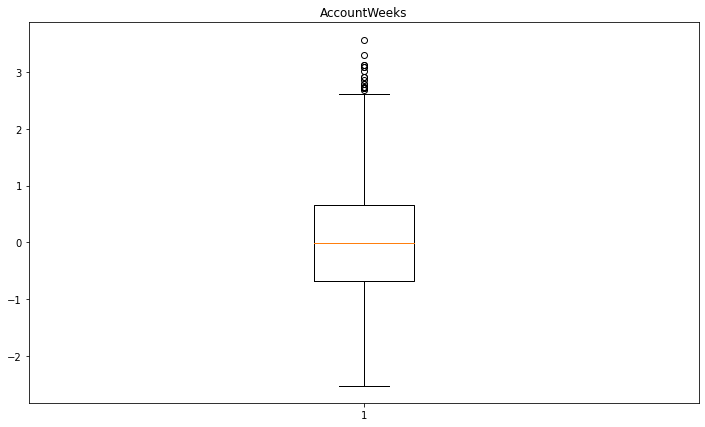

<Figure size 720x504 with 0 Axes>



The Outliers are :  [2.68572534 2.86153348 2.71084079 3.08757252 3.56476604 2.91176438
 2.73595624 2.78618713 3.2884961  3.11268796 3.11268796 3.08757252
 2.78618713 2.73595624 2.91176438 2.71084079 3.01222617 2.71084079]


#################################################################################################



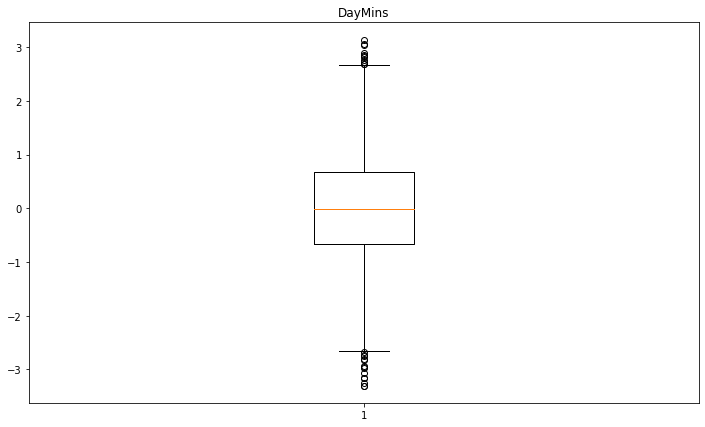

<Figure size 720x504 with 0 Axes>



The Outliers are :  [ 2.81173526  2.8943659   2.69421613  3.14042158  2.85947741 -2.73369879
 -2.67677546  2.83744257  3.06697212 -3.0715663  -2.82551061 -3.30109585
 -3.30109585 -2.94302975  2.75481193 -3.15603317  2.72359591 -2.80531201
 -2.97791824  2.69054365  3.03942858 -3.2533537  -3.15786941 -2.95404716
 -2.75206116]


#################################################################################################



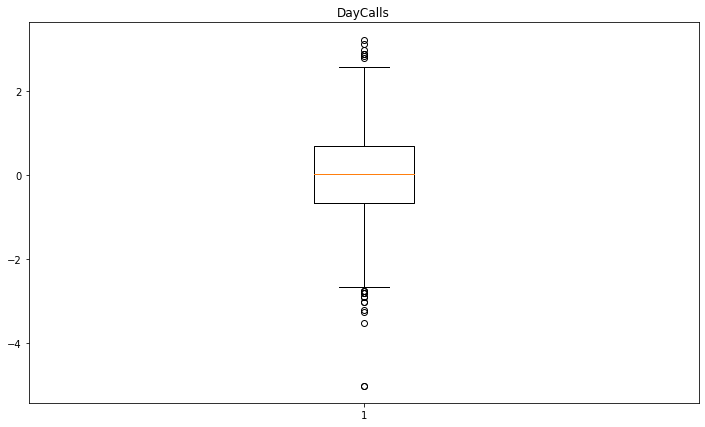

<Figure size 720x504 with 0 Axes>



The Outliers are :  [ 2.86874046  3.11791726 -3.21117353 -3.01183209  2.86874046  3.21758799
 -3.5101857  -2.91216137 -5.00524652 -2.76265529 -5.00524652 -2.76265529
  2.96841118  2.76906974 -3.26100889 -2.91216137  2.86874046  2.8189051
 -2.76265529 -2.81249065 -2.81249065 -2.81249065 -3.01183209]


#################################################################################################



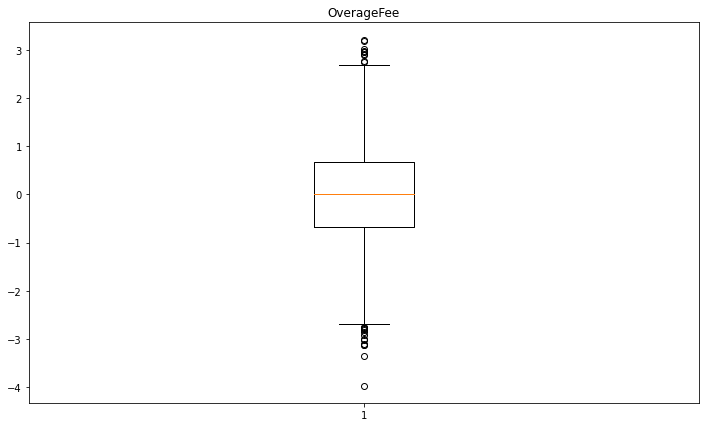

<Figure size 720x504 with 0 Axes>



The Outliers are :  [-2.74184587  2.91027501  2.96943887 -3.34926151  2.94971758 -3.13232735
  2.88660946 -2.80100973 -3.09682903 -2.91933745 -3.12443883 -2.76551141
 -2.80889824 -2.86017359 -3.01399963 -2.78128844  2.95760609 -2.99427834
  2.74067194  3.170596    3.02071421  3.21003857 -3.96456566  2.76828174]


#################################################################################################



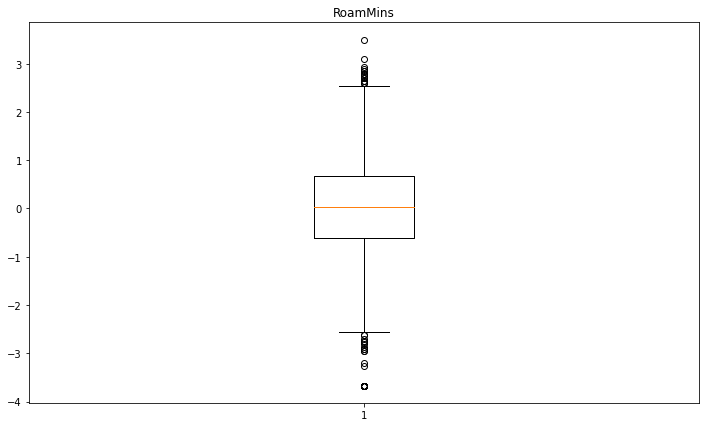

<Figure size 720x504 with 0 Axes>



The Outliers are :  [ 3.49739696 -3.66741342  2.63761972 -2.70016402  3.10333239 -3.66741342
  2.78091592 -2.95093238 -3.66741342  2.60179566  2.60179566  2.85256403
 -3.66741342 -3.66741342 -3.20170074 -3.66741342 -3.66741342 -3.66741342
 -2.87928428  2.78091592 -3.66741342  2.74509187 -3.66741342  2.92421213
 -2.95093238  2.70926782 -2.62851591 -2.55686781  2.63761972 -2.73598807
 -3.66741342 -3.66741342  2.85256403 -3.66741342  2.78091592 -3.27334885
 -3.66741342  2.88838808 -3.66741342 -3.66741342 -2.91510833 -2.62851591
  2.60179566 -2.91510833 -2.80763617 -2.77181212 -3.66741342 -3.66741342
  2.70926782]


#################################################################################################



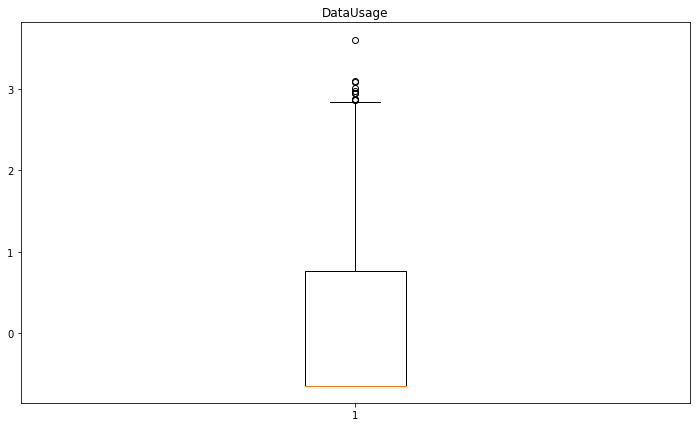

<Figure size 720x504 with 0 Axes>



The Outliers are :  [3.60204937 3.00478911 3.0755173  2.86333274 2.94191961 2.94191961
 2.94191961 2.86333274 3.09123468 2.96549568 2.87905011]


#################################################################################################



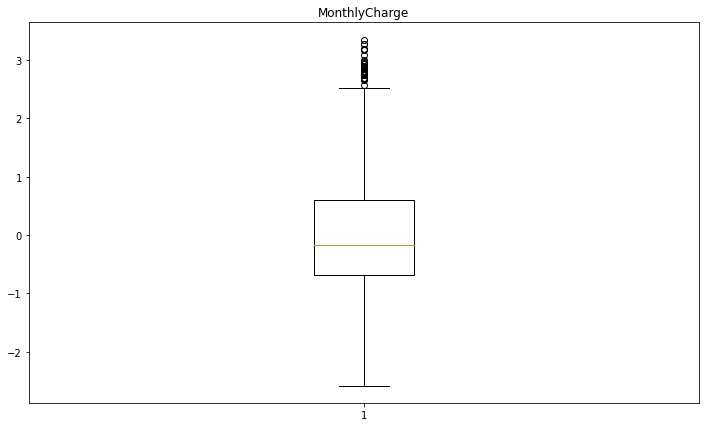

<Figure size 720x504 with 0 Axes>



The Outliers are :  [3.26937737 2.92231514 2.83707178 2.74573961 2.77009486 2.67876269
 2.81880535 3.16586758 3.00146968 2.75791724 3.26937737 2.94667038
 2.69094031 2.73356199 2.81271654 2.78836129 2.89795989 2.5752529
 3.19022283 2.87360465 2.67876269 3.18413402 3.34853192 2.75182842
 2.78836129 2.89187108 2.75791724 2.8492494  2.958848   2.97711444
 3.08062423 2.81880535 2.69702912 2.66049626]


#################################################################################################



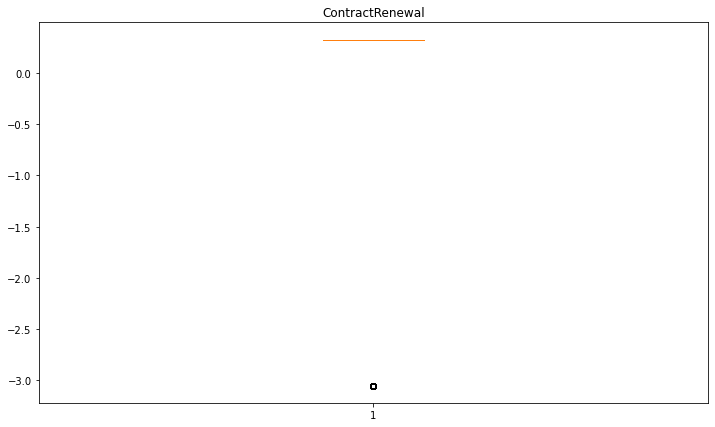

<Figure size 720x504 with 0 Axes>



The Outliers are :  [ 0.32758048  0.32758048  0.32758048 ...  0.32758048 -3.05268496
  0.32758048]


#################################################################################################



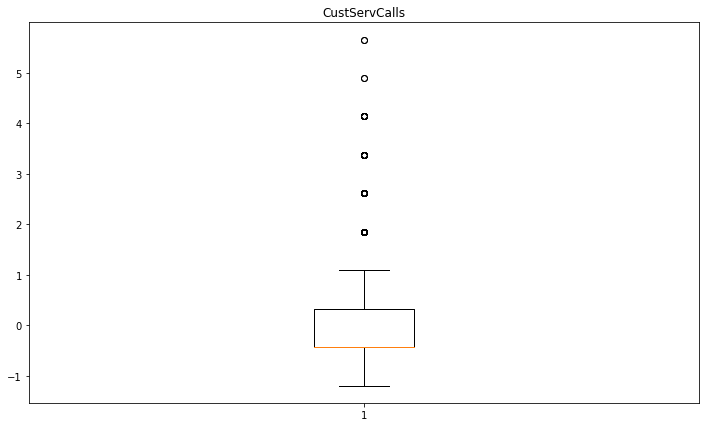

<Figure size 720x504 with 0 Axes>



The Outliers are :  [1.8529274  1.8529274  1.8529274  2.61321388 2.61321388 2.61321388
 1.8529274  1.8529274  1.8529274  1.8529274  1.8529274  1.8529274
 1.8529274  1.8529274  1.8529274  1.8529274  2.61321388 2.61321388
 1.8529274  2.61321388 1.8529274  1.8529274  2.61321388 1.8529274
 1.8529274  1.8529274  1.8529274  1.8529274  2.61321388 1.8529274
 1.8529274  4.13378683 1.8529274  1.8529274  1.8529274  1.8529274
 1.8529274  2.61321388 1.8529274  1.8529274  1.8529274  1.8529274
 1.8529274  2.61321388 1.8529274  4.13378683 1.8529274  5.65435978
 2.61321388 1.8529274  1.8529274  2.61321388 1.8529274  1.8529274
 2.61321388 2.61321388 1.8529274  3.37350035 1.8529274  3.37350035
 2.61321388 2.61321388 2.61321388 3.37350035 2.61321388 1.8529274
 1.8529274  2.61321388 1.8529274  1.8529274  4.13378683 1.8529274
 3.37350035 2.61321388 1.8529274  1.8529274  1.8529274  3.37350035
 1.8529274  1.8529274  2.61321388 1.8529274  1.8529274  1.8529274
 1.8529274  1.8529274  1.8529274  2.61321388 2.61

In [ ]:
#finding the outlier in data 

for i in numeric_df.columns:
  plt.title(i)
  plt.boxplot(numeric_df[i])
  fig = plt.figure(figsize =(10, 7))
  
  plt.show()
  
  q1 = np.quantile(numeric_df[i], 0.25)
 
  # finding the 3rd quartile
  q3 = np.quantile(numeric_df[i], 0.75)
  med = np.median(numeric_df[i])
 
  # finding the iqr region
  iqr = q3-q1
 
  # finding upper and lower whiskers
  upper_bound = q3+(1.5*iqr)
  lower_bound = q1-(1.5*iqr)
  outliers = numeric_df[i][(numeric_df[i] <= lower_bound) | (numeric_df[i] >= upper_bound)]
  print("\n")
  print('The Outliers are : ',np.array(outliers))
  print("\n")

  print("#################################################################################################\n")


This plot shows outliers in each of the feature, the dots off min(lower bound) and max(upper bound) are outliers in data. the outliers for features is represented in a list as well.

In [ ]:
# Machine Learning
## Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## ML Models Diffrent Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

## Comparision of Performance of all Algorithms
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clfk = KNeighborsClassifier(n_neighbors=5, weights='distance')
clfk.fit(X_train, y_train)

pk = clfk.predict(X_test)
pd.DataFrame(classification_report(y_test, pk,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.903827,0.765432,0.893636,0.834630,0.883697
recall,0.979787,0.387500,0.893636,0.683644,0.893636
f1-score,0.940276,0.514523,0.893636,0.727399,0.878348
support,940.000000,160.000000,0.893636,1100.000000,1100.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


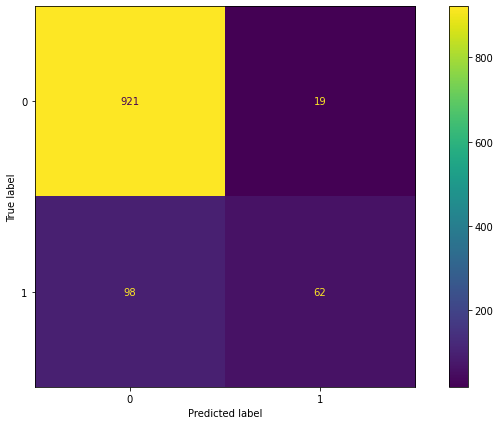

In [ ]:
plot_confusion_matrix(clfk, X_test, y_test)

precision, recall and f1 sore on prediction of not churened is quite high and  churned show low scores. with accuracy of the model of 89%.Recall the Fraction of positives that were correctly being, is 38% for churened.

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(clfk, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0480 ± 0.0129,DayMins
0.0344 ± 0.0110,CustServCalls
0.0213 ± 0.0070,ContractRenewal
0.0178 ± 0.0063,OverageFee
0.0145 ± 0.0062,DataUsage
0.0075 ± 0.0049,RoamMins
0.0020 ± 0.0058,DayCalls
-0.0002 ± 0.0040,AccountWeeks


From the above we can see DayCalls and AccountWeeks to be the lease significant.

---




**Permutation Importance**

Permutation feature importance calculates feature importance by shuffling each predictor and recording the increase in RMSE(root mean square error). This will allow us to assess which  predictors are useful for making predictions.

More on it- 

*  https://towardsdatascience.com/from-scratch-permutation-feature-importance-for-ml-interpretability-b60f7d5d1fe9




In [ ]:
from scipy import stats
def eliminateOutlier(df):
  z_scores = stats.zscore(df)
  #calculate z-scores of `df`
  abs_z_scores = np.abs(z_scores)
  filtered_entries = (abs_z_scores < 3).all(axis=1)
  return df[filtered_entries]

the code eliminates outlier based on Z score 

In [ ]:
df=eliminateOutlier(df)

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [ ]:
X.shape

(2926, 8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clfk = KNeighborsClassifier(n_neighbors=5, weights='distance')
clfk.fit(X_train, y_train)

pk = clfk.predict(X_test)
pd.DataFrame(classification_report(y_test, pk,output_dict=True))


,0,1,accuracy,macro avg,weighted avg
precision,0.913978,0.861111,0.912008,0.887545,0.907904
recall,0.994152,0.279279,0.912008,0.636716,0.912008
f1-score,0.952381,0.421769,0.912008,0.687075,0.891410
support,855.000000,111.000000,0.912008,966.000000,966.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


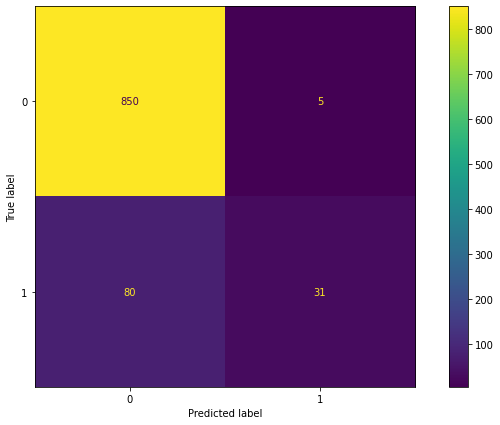

In [ ]:
plot_confusion_matrix(clfk, X_test, y_test)

On Removal of Outliers the model's accuracy increases 2%. other parameters pretty much remain the same.

# Answer the following questions



1.   Which predictor variables are the most important (dependent variable)? 

   Answer.
      1.  DayMins
      2.  CustServCalls
      3.	 ContractRenewal
      4.	OverageFee
      5.	DataUsage
      6.	RoamMins

      the above features contribute in their decreasing order to the predictor

      

2.  What are the likely distributions of the numeric variables and predicator variables?

  Answer. most of the variable are normally distributed except for Customer Service Call (CustServCalls) and Data Usage. Visualization shown in Visualization section.

3. Which independent variables have missing data ? How much? / Are there missing values?

 Answer. None of the feature variable have missing data. 

4. Do the training and test sets have the same data?

 Answer. yes the tain and test have pretty much the same data. Visualization of the same is present in Train and test data section

5. Is the predictor variables independent of all the other predictor variables?

  Answer. We also observe very strong Multicollinearity between features, DataPlans and DataUsage as well as MonthlyCharges with DataPlan and DataUsage.

6. Do the ranges of the predictor variables make sense?

  Answer. the feature have variable ranges/not in same range. hence we perform normalization on the data.

7. Remove outliers and keep outliers (does if have an effect of the final predictive model)?
 
 Answer. the accuracy increases 2% apart from those other parameters are pretty much the same. more detailed explaination in Oulier section

8. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

  Answer. detailed explaination of the above in the imputation section. with their respective values.

9. What are the data types? (Only numeric and categorical)

  Answer. they are of Int and float type. details of each feature and their respective data type in Understanding Data section.

10. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

  Answer. Shown in Visulization section 




**Note-**
All the implementation have explainations to them along with links to understand the concept used in them.



# Conclusion 

From the analysis done above on the data set, it is clear that there is multicolinearity and except DayCalls and AccountWeek all other variables are significant to predict the target churn (target)

# References

1. Sckit learn offcial documentation
2. Refered Towards Data Science
3. Eli5 official documentation
5. towards data science
6. youtube - stat quest
7. geeksforgeeks
8. Seaborn
9. matplotlib


The algorithms for imputation were directly referred from sklearn documentation and geeksforgeeks website. For understanding of concepts related to Permutation Importance, classification_report and confusion matrix multiple sources on youtube were used. For plots seaborn’s and matplotlib’s official website was used.


Copyright (c) 2022  Pratik-Prakash-Sannakki

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.